## Sentiment Analysis of Elden Ring (Game) Reviews using TextBlob and VADER

### Dataset Description

- This contains reviews of a video game called Elden Ring, in different languages such as italian, english, french, spanish and deutsch. All data are retrieved by the steam api ( https://partner.steamgames.com/doc/store/getreviews ).

- The dataset is located at https://www.kaggle.com/datasets/lorenzoshylockl/steam-reviews-of-elden-ring 

### Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import string

from wordcloud import WordCloud, ImageColorGenerator
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6328\3367310017.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load the Dataset

In [5]:
reviews = pd.read_csv(r"C:\Users\DELL\Downloads\Compressed\archive_3\df_eldenRing.csv")

reviews.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,written_during_early_access,hidden_in_steam_china,steam_china_location,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,131167159,english,RPG? What role am I playing? The victim?,1674161011,1674161011,True,2188,2189,0.971413,0,...,False,True,NaN,76561198038703897,0,47,4863,0,4731,1678321169
1,132142244,english,"""Try jumping""\n*20 bloodstains surrounding the...",1675452305,1675452305,True,1773,928,0.969785,0,...,False,True,NaN,76561198848020753,668,46,14715,0,14610,1704084029
2,112052982,english,First time with a Dark Souls type game and lov...,1647106589,1647106589,True,13760,1109,0.967295,0,...,False,False,NaN,76561197971854668,0,3,21213,0,977,1653718937
3,111180228,english,"The note said ""chest ahead"" at the edge of a c...",1645984692,1645984692,True,10766,6648,0.966567,154,...,False,False,NaN,76561198142415989,167,20,8102,0,1112,1667703302
4,111834761,english,you can hug a woman,1646786974,1646786974,True,8133,3145,0.964465,99,...,False,False,NaN,76561197996565477,9488,91,24073,0,2779,1649377625


### Exploratory Data Analysis (EDA)

In [6]:
#Get a list of colums available
reviews.columns

Index(['recommendationid', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access',
       'hidden_in_steam_china', 'steam_china_location', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [7]:
#Check for information of the dataset columns(correct Data type if needed)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485209 entries, 0 to 485208
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   recommendationid                485209 non-null  int64  
 1   language                        485209 non-null  object 
 2   review                          483609 non-null  object 
 3   timestamp_created               485209 non-null  int64  
 4   timestamp_updated               485209 non-null  int64  
 5   voted_up                        485209 non-null  bool   
 6   votes_up                        485209 non-null  int64  
 7   votes_funny                     485209 non-null  int64  
 8   weighted_vote_score             485209 non-null  float64
 9   comment_count                   485209 non-null  int64  
 10  steam_purchase                  485209 non-null  bool   
 11  received_for_free               485209 non-null  bool   
 12  written_during_e

In [8]:
#Check for total number of rows and columns available in the dataset
reviews.shape

(485209, 22)

In [9]:
#Selecting only the 'review' and the language column as they are the only columns we need
reviews = reviews[['review','language']]
reviews

,review,language
0,RPG? What role am I playing? The victim?,english
1,"""Try jumping""\n*20 bloodstains surrounding the...",english
2,First time with a Dark Souls type game and lov...,english
3,"The note said ""chest ahead"" at the edge of a c...",english
4,you can hug a woman,english
...,...,...
485204,Me da igual lo largo que sea para lo que cuest...,spanish
485205,Excelente!! un mundo abierto atrapante y unaju...,spanish
485206,No aguanto más esta basura de juego.,spanish
485207,🟨🟨🟨🟨⬛\n🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨🟨⬛⬛\n🟨🟨⬛⬛⬛⬛⬜⬜⬛\n🟨🟨⬛...,spanish


In [10]:
#Checking if we have blank reviews (null values) 
reviews.isnull().sum()

review      1600
language       0
dtype: int64

In [11]:
#Create a df_null to check the rows with NULL values and empty strings
reviews_null = reviews.loc[(reviews['review'].isnull()) | (reviews['review']==' ')]
reviews_null

,review,language
4682,NaN,english
5599,NaN,english
6311,NaN,english
6857,NaN,english
7702,NaN,english
...,...,...
483517,NaN,spanish
484011,NaN,spanish
484593,NaN,english
484967,NaN,english


In [12]:
filtered_reviews = reviews.loc[~reviews.index.isin(reviews_null.index)]
filtered_reviews

,review,language
0,RPG? What role am I playing? The victim?,english
1,"""Try jumping""\n*20 bloodstains surrounding the...",english
2,First time with a Dark Souls type game and lov...,english
3,"The note said ""chest ahead"" at the edge of a c...",english
4,you can hug a woman,english
...,...,...
485204,Me da igual lo largo que sea para lo que cuest...,spanish
485205,Excelente!! un mundo abierto atrapante y unaju...,spanish
485206,No aguanto más esta basura de juego.,spanish
485207,🟨🟨🟨🟨⬛\n🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨🟨⬛⬛\n🟨🟨⬛⬛⬛⬛⬜⬜⬛\n🟨🟨⬛...,spanish


In [13]:
#Reassign filtered reviews to the reviews variable
reviews = filtered_reviews

### Data Cleaning

In [14]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    #contraction
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t", "will not", text)

    # remove hyperlinks
    text = re.sub(r'https?:\/\/.\S+', "", text)
    
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)

    # Remove non-alphanumeric characters (except for some punctuation)
    allowed_chars = string.ascii_letters + string.digits + ' .,?!'
    text = re.sub(r'[^{}]'.format(allowed_chars), '', text)

    # Remove HTML entities (optional)
    text = re.sub(r'&[a-z]+;', '', text)  # Example: remove basic HTML entities

    # Remove repeated characters (more than 2 consecutive)
    text = re.sub(r'([^\s])\1{2,}', r'\1\1', text)

    # Handle emojis (optional)
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # objects & transport
                              u"\U0001F1E0-\U0001F1FF"  # flags
                              "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # Uncomment to remove emojis

    # Optional: Replace specific patterns (e.g., URLs, email addresses)
    text = re.sub(r'http[s]?://\S+', 'URL', text)
    text = re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', 'EMAIL', text)

    #separate the words
    text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",text) if s])

    return text

reviews['cleaned_text'] = reviews['review'].map(clean_text)


In [15]:
reviews.tail()

,review,language,cleaned_text
485204,Me da igual lo largo que sea para lo que cuest...,spanish,me da igual lo largo que sea para lo que cuest...
485205,Excelente!! un mundo abierto atrapante y unaju...,spanish,excelente un mundo abierto atrapante y unajuga...
485206,No aguanto más esta basura de juego.,spanish,no aguanto ms esta basura de juego
485207,🟨🟨🟨🟨⬛\n🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨🟨⬛⬛\n🟨🟨⬛⬛⬛⬛⬜⬜⬛\n🟨🟨⬛...,spanish,cuando yo la vi
485208,"El pitjor joc que he jugat mai sincerament, pr...",spanish,el pitjor joc que he jugat mai sincerament pre...


In [16]:
# import unicodedata

# def clean_text(text):
#     cleaned_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return cleaned_text

# # Apply the clean_text function to each element in the 'text_column'
# reviews['review'] = reviews['review'].apply(lambda x: clean_text(x))

In [17]:
reviews.shape

(483600, 3)

In [18]:
#Tokenization
import nltk
# nltk.download('punkt')

# Tokenize the reviews into words
from nltk.tokenize import word_tokenize
reviews['tokens'] = reviews['cleaned_text'].map(word_tokenize)
reviews.head()

,review,language,cleaned_text,tokens
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]"
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]"
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game..."
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,..."
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]"


In [19]:
#Stopwords Removal

# nltk.download('stopwords')
# Remove stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
reviews['tokens_stop'] = reviews.tokens.apply(stop_lambda)
reviews.head()

,review,language,cleaned_text,tokens,tokens_stop
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]"
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]"
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,..."
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin..."
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]"


In [20]:
# Parts of speech(POS) tagging

# nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag,pos_tag_sents

# #Use if dealing with smaller dataset, slows down if used with big data
# pos_lambda = lambda x: nltk.pos_tag(x)
# reviews['tokens_pos'] = (reviews.tokens_stop.apply(pos_lambda))

#Use this if dealing with big data to improve performance
reviews['tokens_pos']= pos_tag_sents(reviews['tokens_stop'].tolist()) 

reviews.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim..."
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ..."
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ..."
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead..."
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]"


In [21]:
# Lemmatization (smarter form of stemming and takes context into account)

# nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
reviews['tokens_lemma'] = reviews.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

In [22]:
reviews.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]"
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]"
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap..."
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing..."
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]"


In [23]:
#Rejoin tokens_lemma into string form in preparation for sentiment analysis
reviews['lemma_string'] = reviews['tokens_lemma'].agg(' '.join)

In [24]:
# reviews['lemma_string'] = [word for word in reviews['lemma_string'] if not word in stopwords.words()]

In [25]:
reviews.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman


In [26]:
###Language Detection using Langdetect library

# from langdetect import detect
# from langdetect import DetectorFactory
# DetectorFactory.seed = 0

# # Function to detect language, handling null values
# def detect_language(text):
#     if text is not None:
#         return detect(text)
#     else:
#         return None

# # Apply language detection function to create a new column
# reviews['language'] = reviews['content'].apply(detect_language)

In [27]:
###Language Detection using Lingua-Language-Detector library

from lingua import Language, LanguageDetectorBuilder

def detect_lang(text):
  languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]
  detector = LanguageDetectorBuilder.from_languages(*languages).build()
  language = detector.detect_language_of(text)

  try:
    if language == Language.ENGLISH:
      return language
    else:
      return 'Not English'
  except:
    return 'Unknown'
  

# Apply language detection function to the 'text' column
reviews["language_new"] = reviews["cleaned_text"].apply(detect_lang)
reviews


,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string,language_new
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim,Language.ENGLISH
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message,Language.ENGLISH
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...,Language.ENGLISH
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...,Language.ENGLISH
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman,Language.ENGLISH
...,...,...,...,...,...,...,...,...,...
485204,Me da igual lo largo que sea para lo que cuest...,spanish,me da igual lo largo que sea para lo que cuest...,"[me, da, igual, lo, largo, que, sea, para, lo,...","[da, igual, lo, largo, que, sea, para, lo, que...","[(da, NN), (igual, JJ), (lo, NN), (largo, NN),...","[da, igual, lo, largo, que, sea, para, lo, que...",da igual lo largo que sea para lo que cuesta l...,Not English
485205,Excelente!! un mundo abierto atrapante y unaju...,spanish,excelente un mundo abierto atrapante y unajuga...,"[excelente, un, mundo, abierto, atrapante, y, ...","[excelente, un, mundo, abierto, atrapante, una...","[(excelente, NN), (un, JJ), (mundo, NN), (abie...","[excelente, un, mundo, abierto, atrapante, una...",excelente un mundo abierto atrapante unajugabi...,Not English
485206,No aguanto más esta basura de juego.,spanish,no aguanto ms esta basura de juego,"[no, aguanto, ms, esta, basura, de, juego]","[aguanto, ms, esta, basura, de, juego]","[(aguanto, IN), (ms, JJ), (esta, JJ), (basura,...","[aguanto, ms, esta, basura, de, juego]",aguanto ms esta basura de juego,Not English
485207,🟨🟨🟨🟨⬛\n🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨⬛\n🟨🟨🟨🟨🟨🟨⬛⬛\n🟨🟨⬛⬛⬛⬛⬜⬜⬛\n🟨🟨⬛...,spanish,cuando yo la vi,"[cuando, yo, la, vi]","[cuando, yo, la, vi]","[(cuando, NN), (yo, NN), (la, NN), (vi, NN)]","[cuando, yo, la, vi]",cuando yo la vi,Not English


### Comparison of Original Language Tag vs Results of Lingua

In [28]:
reviews['language'].value_counts()

language
english    405033
spanish     28646
german      25228
french      18393
italian      6300
Name: count, dtype: int64

In [29]:
reviews['language_new'].value_counts()

language_new
Language.ENGLISH    387483
Not English          96117
Name: count, dtype: int64

In [30]:
# It seems that Lingua was able to detect 96% of the reviews originally tagged as english.
387483/405033

0.9566701972431876

### Sentiment Analysis using TextBlob

In [31]:
# Use TextBlob package for Sentiment Analysis
from textblob import TextBlob

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [32]:
#Filter only the English Reviews
reviews = reviews.loc[reviews['language_new']==Language.ENGLISH]

In [33]:
# Generate Polarity Scores for each tweet and classify into Positive, Negative, or Neutral
reviews['polarity'] = reviews['lemma_string'].apply(getPolarity)
reviews['subjectivity'] = reviews['lemma_string'].apply(getSubjectivity) 
reviews['analysis_textblob'] = reviews['polarity'].apply(analysis)
reviews.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string,language_new,polarity,subjectivity,analysis_textblob
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim,Language.ENGLISH,-0.075,0.050000,Negative
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message,Language.ENGLISH,0.000,0.000000,Neutral
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...,Language.ENGLISH,0.175,0.488889,Positive
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...,Language.ENGLISH,0.500,0.888889,Positive
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman,Language.ENGLISH,0.000,0.000000,Neutral


In [76]:
#Compute the percentage of each Polarity Type
counts = reviews['analysis_textblob'].value_counts(normalize=True)
counts

analysis_textblob
Positive    0.492419
Negative    0.266252
Neutral     0.241329
Name: proportion, dtype: float64

In [87]:
#Compute the number of reviews under each Polarity Type
counts1 = reviews['analysis_textblob'].value_counts()
counts1

analysis_textblob
Positive    190804
Negative    103168
Neutral      93511
Name: count, dtype: int64

### Interpretation of Results - TextBlob

- **49%** of the reviews are **positive**. This means that less than half of reviews in our sample show a **positive reaction** when it comes to playing Elden Ring.
</br>

- **24%** of the reviews are **neutral**. This means that majority of reviews in our sample show a **neutral reaction** when it comes to playing Elden Ring. 
</br>

- **27%** of the reviews are **negative**. This means that only a small percentage of reviews in our sample show a **negative reaction** when it comes to playing Elden Ring.
</br>

### Word Cloud

Text(0.5, 1.0, 'All Sentiments')

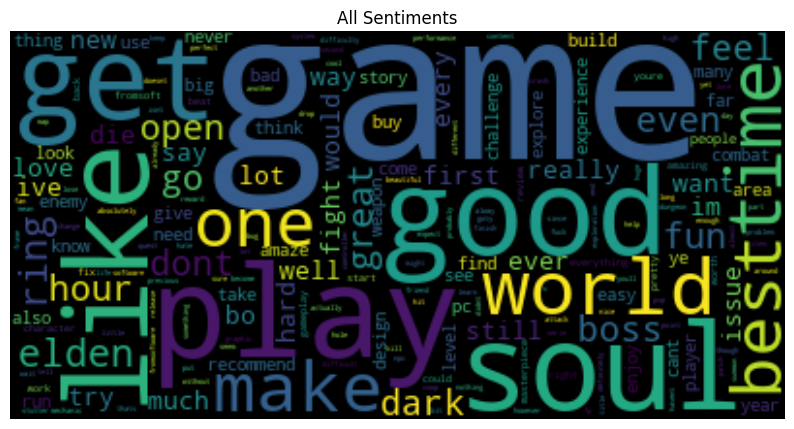

In [36]:
# Display the word cloud
# Create a word cloud for positive sentiment text
filtered_text = reviews['lemma_string']

wc=WordCloud(stopwords=stop_words, collocations=False, background_color="black")  
wc.generate(' '.join(filtered_text))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("All Sentiments")

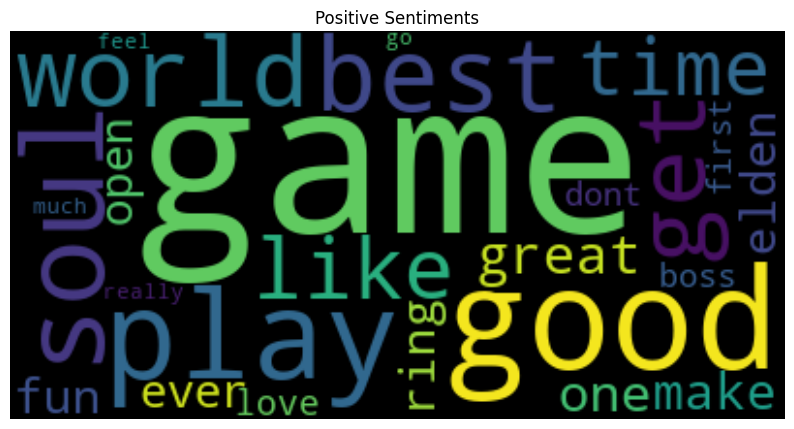

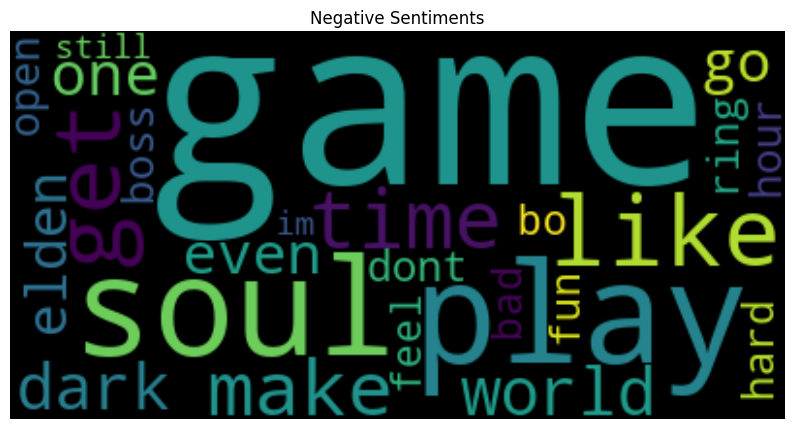

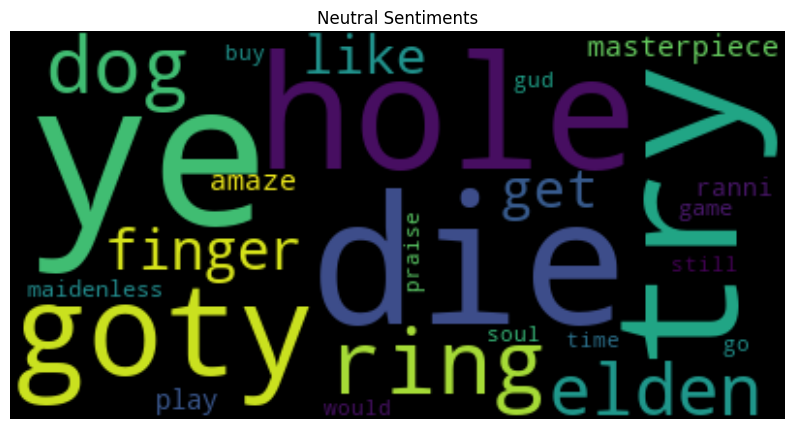

In [50]:
analysis_tags = ["Positive", "Negative", "Neutral"]

for analysis_tag in analysis_tags:

    # Create a word cloud for positive sentiment text
    filtered_text = reviews[(reviews['analysis_textblob'] == analysis_tag) & (reviews['language_new'] == Language.ENGLISH)]
    # positive_text = ' '.join(positive_text['lemma_string'])

    # wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    # Display the word cloud
    wc=WordCloud(stopwords=stop_words, collocations=False, background_color="black",max_words=25)  
    wc.generate(' '.join(filtered_text['lemma_string']))
    plt.figure(figsize=(10,12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title( analysis_tag + " "+ "Sentiments")

### Top Words Per Sentiment Type

In [38]:
Positive_rev = reviews.loc[reviews['analysis_textblob']=='Positive']
Negative_rev = reviews.loc[reviews['analysis_textblob']=='Negative']
Neutral_rev = reviews.loc[reviews['analysis_textblob']=='Neutral']

In [39]:
from collections import Counter

top = Counter([item for sublist in Positive_rev['tokens_lemma'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,game,217917
1,good,66222
2,play,50127
3,best,41548
4,world,37564
5,get,37312
6,like,36347
7,great,32525
8,time,32494
9,one,29186


In [40]:
from collections import Counter

top = Counter([item for sublist in Negative_rev['tokens_lemma'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,game,194183
1,play,35708
2,like,30573
3,get,29788
4,soul,22593
5,time,21811
6,make,19871
7,world,19228
8,dark,18011
9,one,15495


In [41]:
from collections import Counter

top = Counter([item for sublist in Neutral_rev['tokens_lemma'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Oranges')

,Common_words,count
0,yes,7367
1,die,5980
2,try,5402
3,hole,5106
4,goty,4376
5,ring,3997
6,dog,3859
7,elden,3829
8,finger,3826
9,get,3508


In [51]:
# reviews.to_csv('reviews.csv',index=False)

### Sentiment Analysis using Vader

In [52]:
reviews1 = reviews.copy()
# reviews1 = pd.read_csv(r"C:\Users\DELL\Downloads\PORTFOLIO FILES\reviews.csv")
reviews1

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string,language_new,polarity,subjectivity,analysis_textblob
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim,Language.ENGLISH,-0.075000,0.050000,Negative
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message,Language.ENGLISH,0.000000,0.000000,Neutral
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...,Language.ENGLISH,0.175000,0.488889,Positive
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...,Language.ENGLISH,0.500000,0.888889,Positive
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman,Language.ENGLISH,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
485157,"VERY good game, and it was my first souls game...",spanish,very good game and it was my first souls game ...,"[very, good, game, and, it, was, my, first, so...","[good, game, first, souls, game, always, wante...","[(good, JJ), (game, NN), (first, RB), (souls, ...","[good, game, first, souls, game, always, want,...",good game first souls game always want try dar...,Language.ENGLISH,0.216991,0.538095,Positive
485159,wow,spanish,wow,[wow],[wow],"[(wow, NN)]",[wow],wow,Language.ENGLISH,0.100000,1.000000,Positive
485201,me mori\n,spanish,me mori,"[me, mori]",[mori],"[(mori, NN)]",[mori],mori,Language.ENGLISH,0.000000,0.000000,Neutral
485202,mu weeee,spanish,mu wee,"[mu, wee]","[mu, wee]","[(mu, NN), (wee, NN)]","[mu, wee]",mu wee,Language.ENGLISH,0.000000,0.000000,Neutral


In [62]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
vds = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


In [63]:
reviews1['vader_score'] = reviews1['lemma_string'].apply(lambda review: vds.polarity_scores(review))

reviews1.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string,language_new,polarity,subjectivity,analysis_textblob,vader_score
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim,Language.ENGLISH,-0.075,0.050000,Negative,"{'neg': 0.356, 'neu': 0.339, 'pos': 0.305, 'co..."
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message,Language.ENGLISH,0.000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...,Language.ENGLISH,0.175,0.488889,Positive,"{'neg': 0.145, 'neu': 0.602, 'pos': 0.253, 'co..."
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...,Language.ENGLISH,0.500,0.888889,Positive,"{'neg': 0.101, 'neu': 0.755, 'pos': 0.145, 'co..."
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman,Language.ENGLISH,0.000,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp..."


In [66]:
reviews1['compound']  = reviews1['vader_score'].apply(lambda score_dict: score_dict['compound'])
reviews1.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string,language_new,polarity,subjectivity,analysis_textblob,vader_score,compound
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim,Language.ENGLISH,-0.075,0.050000,Negative,"{'neg': 0.356, 'neu': 0.339, 'pos': 0.305, 'co...",-0.0772
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message,Language.ENGLISH,0.000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...,Language.ENGLISH,0.175,0.488889,Positive,"{'neg': 0.145, 'neu': 0.602, 'pos': 0.253, 'co...",0.4203
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...,Language.ENGLISH,0.500,0.888889,Positive,"{'neg': 0.101, 'neu': 0.755, 'pos': 0.145, 'co...",0.1779
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman,Language.ENGLISH,0.000,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767


In [72]:
def analysis_vader(compound):
    # decide sentiment as positive, negative and neutral
    if compound >= 0.05 :
        return "Positive"
    elif compound <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

reviews1['analysis_vader'] = reviews1['compound'].apply(analysis_vader) 
reviews1.head()

,review,language,cleaned_text,tokens,tokens_stop,tokens_pos,tokens_lemma,lemma_string,language_new,polarity,subjectivity,analysis_textblob,vader_score,compound,analysis_vader
0,RPG? What role am I playing? The victim?,english,rpg what role am i playing the victim,"[rpg, what, role, am, i, playing, the, victim]","[rpg, role, playing, victim]","[(rpg, JJ), (role, NN), (playing, NN), (victim...","[rpg, role, playing, victim]",rpg role playing victim,Language.ENGLISH,-0.075,0.050000,Negative,"{'neg': 0.356, 'neu': 0.339, 'pos': 0.305, 'co...",-0.0772,Negative
1,"""Try jumping""\n*20 bloodstains surrounding the...",english,try bloodstains surrounding the message,"[try, bloodstains, surrounding, the, message]","[try, bloodstains, surrounding, message]","[(try, NN), (bloodstains, NNS), (surrounding, ...","[try, bloodstain, surround, message]",try bloodstain surround message,Language.ENGLISH,0.000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,First time with a Dark Souls type game and lov...,english,first time with a dark souls type game and lov...,"[first, time, with, a, dark, souls, type, game...","[first, time, dark, souls, type, game, loving,...","[(first, JJ), (time, NN), (dark, JJ), (souls, ...","[first, time, dark, soul, type, game, love, ap...",first time dark soul type game love apparently...,Language.ENGLISH,0.175,0.488889,Positive,"{'neg': 0.145, 'neu': 0.602, 'pos': 0.253, 'co...",0.4203,Positive
3,"The note said ""chest ahead"" at the edge of a c...",english,the note said chest ahead at the edge of a cli...,"[the, note, said, chest, ahead, at, the, edge,...","[note, said, chest, ahead, edge, cliff, nothin...","[(note, NN), (said, VBD), (chest, JJS), (ahead...","[note, say, chest, ahead, edge, cliff, nothing...",note say chest ahead edge cliff nothing sightt...,Language.ENGLISH,0.500,0.888889,Positive,"{'neg': 0.101, 'neu': 0.755, 'pos': 0.145, 'co...",0.1779,Positive
4,you can hug a woman,english,you can hug a woman,"[you, can, hug, a, woman]","[hug, woman]","[(hug, NN), (woman, NN)]","[hug, woman]",hug woman,Language.ENGLISH,0.000,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767,Positive


In [80]:
#Compute the percentage of each Polarity Type
counts_vader = reviews1['analysis_vader'].value_counts(normalize=True)
counts_vader

analysis_vader
Positive    0.637783
Neutral     0.208923
Negative    0.153294
Name: proportion, dtype: float64

In [85]:
#Compute the number of reviews under each Polarity Type
counts_vader2 = reviews1['analysis_vader'].value_counts()
counts_vader2

analysis_vader
Positive    247130
Neutral      80954
Negative     59399
Name: count, dtype: int64

### Interpretation of Results - VADER

- **64%** of the reviews are **positive**. This means that less than half of reviews in our sample show a **positive reaction** when it comes to playing Elden Ring.
</br>

- **21%** of the reviews are **neutral**. This means that majority of reviews in our sample show a **neutral reaction** when it comes to playing Elden Ring. 
</br>

- **15%** of the reviews are **negative**. This means that only a small percentage of reviews in our sample show a **negative reaction** when it comes to playing Elden Ring.
</br>

### Word Cloud

Text(0.5, 1.0, 'All Sentiments')

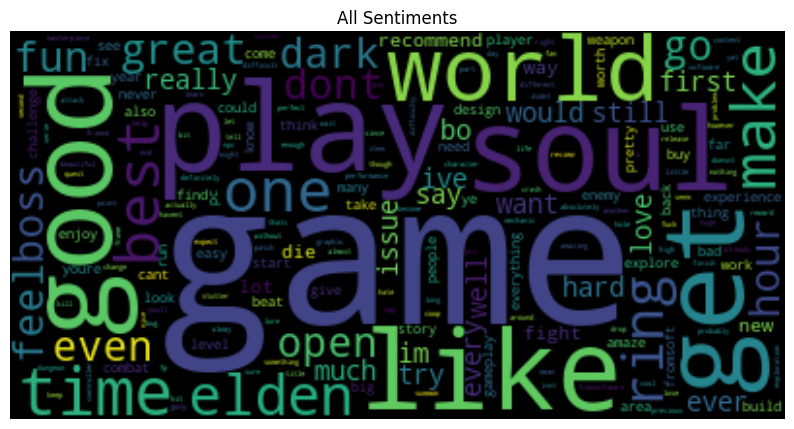

In [88]:
# Display the word cloud
# Create a word cloud for positive sentiment text
filtered_text1 = reviews1['lemma_string']

wc=WordCloud(stopwords=stop_words, collocations=False, background_color="black")  
wc.generate(' '.join(filtered_text1))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("All Sentiments")

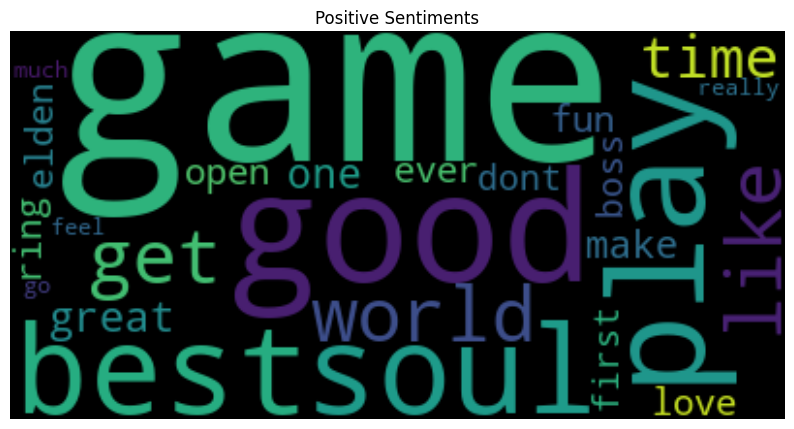

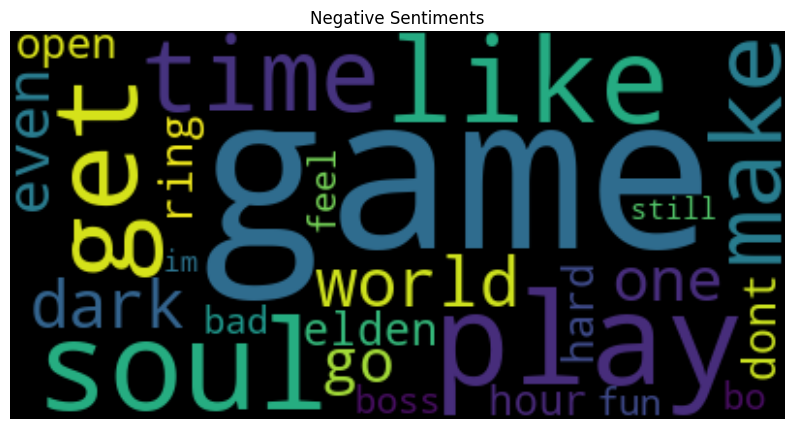

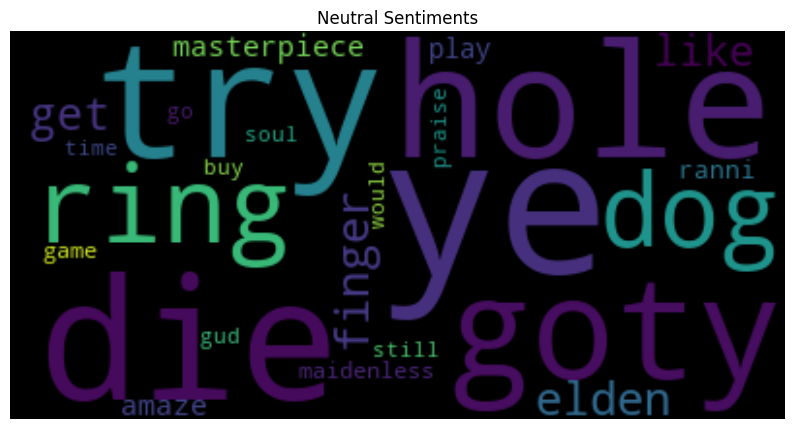

In [89]:
analysis_tags1 = ["Positive", "Negative", "Neutral"]

for analysis_tag1 in analysis_tags1:

    # Create a word cloud for positive sentiment text
    filtered_text1 = reviews1[(reviews1['analysis_textblob'] == analysis_tag1) & (reviews1['language_new'] == Language.ENGLISH)]
    # positive_text = ' '.join(positive_text['lemma_string'])

    # wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    # Display the word cloud
    wc=WordCloud(stopwords=stop_words, collocations=False, background_color="black",max_words=25)  
    wc.generate(' '.join(filtered_text1['lemma_string']))
    plt.figure(figsize=(10,12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title( analysis_tag1 + " "+ "Sentiments")

### Top Words Per Sentiment Type

In [94]:
Positive_rev1 = reviews1.loc[reviews1['analysis_vader']=='Positive']
Negative_rev1 = reviews1.loc[reviews1['analysis_vader']=='Negative']
Neutral_rev1 = reviews1.loc[reviews1['analysis_vader']=='Neutral']

In [95]:
from collections import Counter

top = Counter([item for sublist in Positive_rev1['tokens_lemma'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,game,321189
1,play,73973
2,good,67578
3,like,55732
4,get,48484
5,world,46664
6,best,43926
7,time,41067
8,soul,37903
9,one,35607


In [96]:
from collections import Counter

top = Counter([item for sublist in Negative_rev1['tokens_lemma'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,game,72864
1,get,18499
2,die,14458
3,like,13702
4,play,13695
5,time,12735
6,make,11472
7,bos,9807
8,enemy,9781
9,world,9578


In [97]:
from collections import Counter

top = Counter([item for sublist in Neutral_rev1['tokens_lemma'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Oranges')

,Common_words,count
0,game,20081
1,try,5538
2,hole,5045
3,soul,4838
4,dont,4549
5,dark,4184
6,goty,4150
7,finger,3954
8,dog,3778
9,ring,3771
